In [2]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

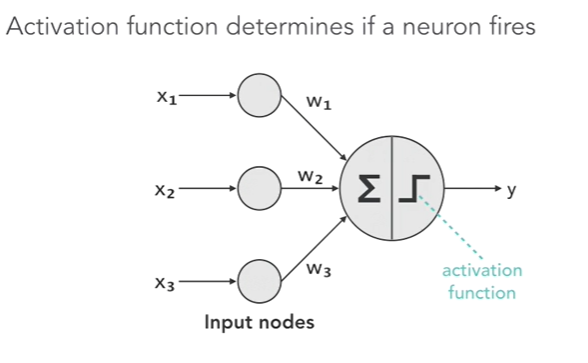

In [4]:
from IPython.display import Image
Image(filename='data/activation_function_neuron.png')

# What is an activation function?
- An activation function is one that outputs a smaller value for tiny inputs and a higher value for inputs that are greater than a threshold value.
- By generating a weighted sum and addition bias with it, the activation function determines whether a neuron should be turned on. 

# Types of activation functions -
1. Linear activation function
2. Non-linear activation function

# Why do we require an activation function?
- As they can introduce non-linearity in neural networks (NN), thus enabling the NN to learn powerful operations.
- If activation functions are taken out from a feed-forward network, the network might be refactored into straightforward linear function or matrix transformation.

# Why do we require non-linearity?
- Input is transformed nonlinearly by the activation function, allowing the system to learn and perform more challenging tasks.
- The mixture of two linear functions yields a linear function in itself, so no matter how several hidden layers we add to a neural network, they all will behave in the same way. The neuron cannot learn if all it has is a linear model.

# Linear activation functions -

## Binary Step Activation Function
Binary step function returns value either 0 or 1.

It returns '0' if the input is the less than threshold
It returns '1' if the input is greater than threshold

In [13]:
# Code for binary step activation function

def binary_step(x:int, threshold:int=0):
    ''' It returns '0' if the input is less than threshold otherwise it returns one '''
    return np.heaviside(x,1)

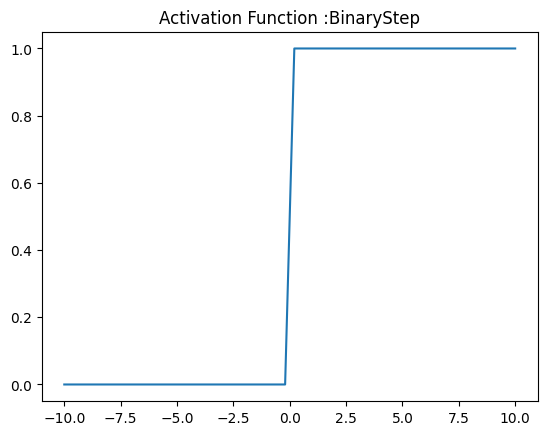

In [14]:
x = np.linspace(-10, 10)
plt.plot(x, binary_step(x, threshold=0))
plt.axis('tight')
plt.title('Activation Function :BinaryStep')
plt.show()